# 베르누이 분포

## 베르누이 시도

결과가 두 가지 중 하나로만 나오는 실험이나 시도를 **베르누이 시도**(Bernoulli trial)라고 한다. 예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것은 베르누이 시도의 일종이다.

## 베르누이 확률변수

베르누이 확률변수의 결과를 실수 0 또는 1로 바꾼 것을 **베르누이 확률변수(Bernoulli random variable)**라고 한다. 베르누이 확률변수는 두 가지 값 중 하나만 가질 수 있으므로 이산확률변수(discrete random variable)이다. 베르누이 확률변수의 표본 값은 보통 정수 1과 0으로 표현하지만 때로는 정수 1과 -1로 표현하는 경우도 있다.

베르누이 확률변수의 확률질량함수는 다음과 같다.

$$
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
$$

베르누이 확률변수는 **1이 나올 확률**을 의미하는 $\mu$라는 **모수(parameter)**를 가진다. 변수와 모수는 세미콜론(;, semi-colone)기호로 분리하였다. 0이 나올 확률은 $1 - \mu$이다.

위 식을 하나의 수식으로 표현하면 다음처럼 쓸 수 있다.

$$
\text{Bern}(x;\mu) = \mu^x(1-\mu)^{(1-x)}
$$

#### 연습 문제 8.2.1

위 식에서 $x=1$과 $x=0$을 각각 대입하여 원래의 확률 질량 함수 수식이 나오는 것을 확인한다.

만약 베르누이 확률변수가 1과 0이 아니라 1과 -1이라는 값을 가진다면 다음과 같은 수식으로 써야 한다.

$$ \text{Bern}(x; \mu) = \mu^{(1+x)/2} (1-\mu)^{(1-x)/2} $$

만약 어떤 확률변수 $X$가 베르누이 분포에 의해 발생된다면 **"확률변수 $X$가 베르누이 분포를 따른다"**라고 말하고 다음과 같이 수식으로 쓴다.

$$ X \sim \text{Bern}(x;\mu) $$

## SciPy를 사용한 베르누이 확률변수의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 `bernoulli` 클래스는 베르누이 확률변수를 구현하였다. `p` 인수로 분포의 모수 $\mu$을 설정한다. 

다음 예에서는 p=0.6 으로 설정하였다. 이러한 확률변수를 만든 것은 앞변이 나올 확률이 0.6인 동전을 만든 것과 같다.

In [1]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

확률질량함수는 `pmf` 메서드이다.

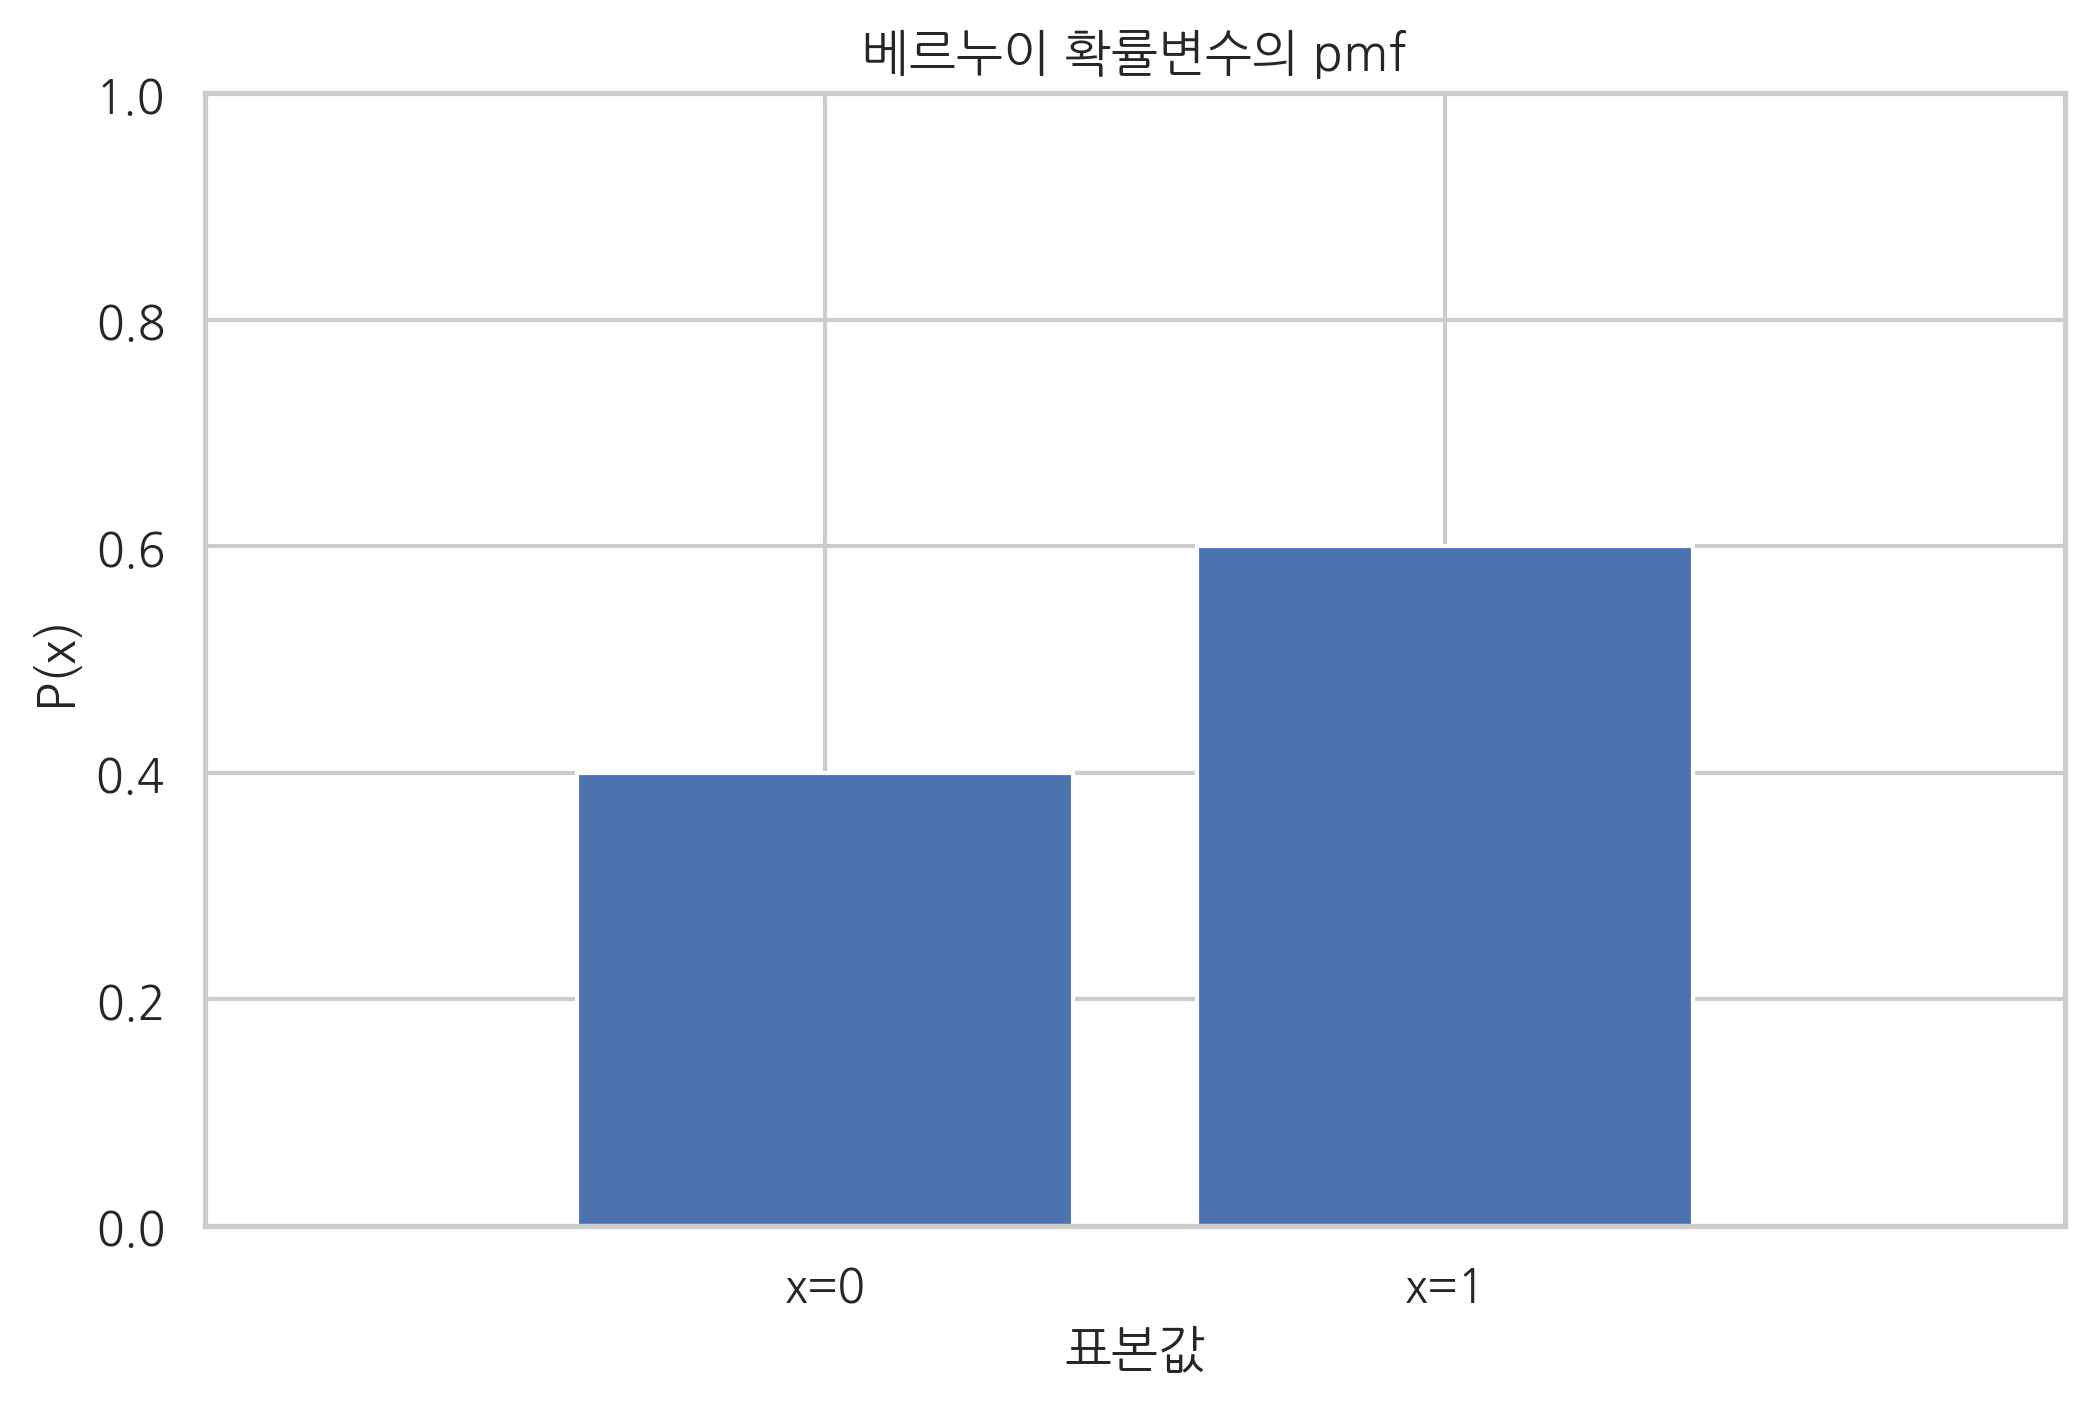

In [2]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 pmf")
plt.show()

표본값을 무작위로 생성하려면 `rvs` 메서드를 사용한다. 다음 코드는 100개의 표본을 생성한다. 이는 위에서 만든 동전을 100번 던져 나온 결과를 나타낸 것과 같다. 그래서 확률변수의 표본을 생성하는 작업을 **시뮬레이션(simulation)**이라고도 부른다. 

In [3]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

다음은 생성 결과를 seaborn의 `countplot` 명령으로 시각화한 것이다.

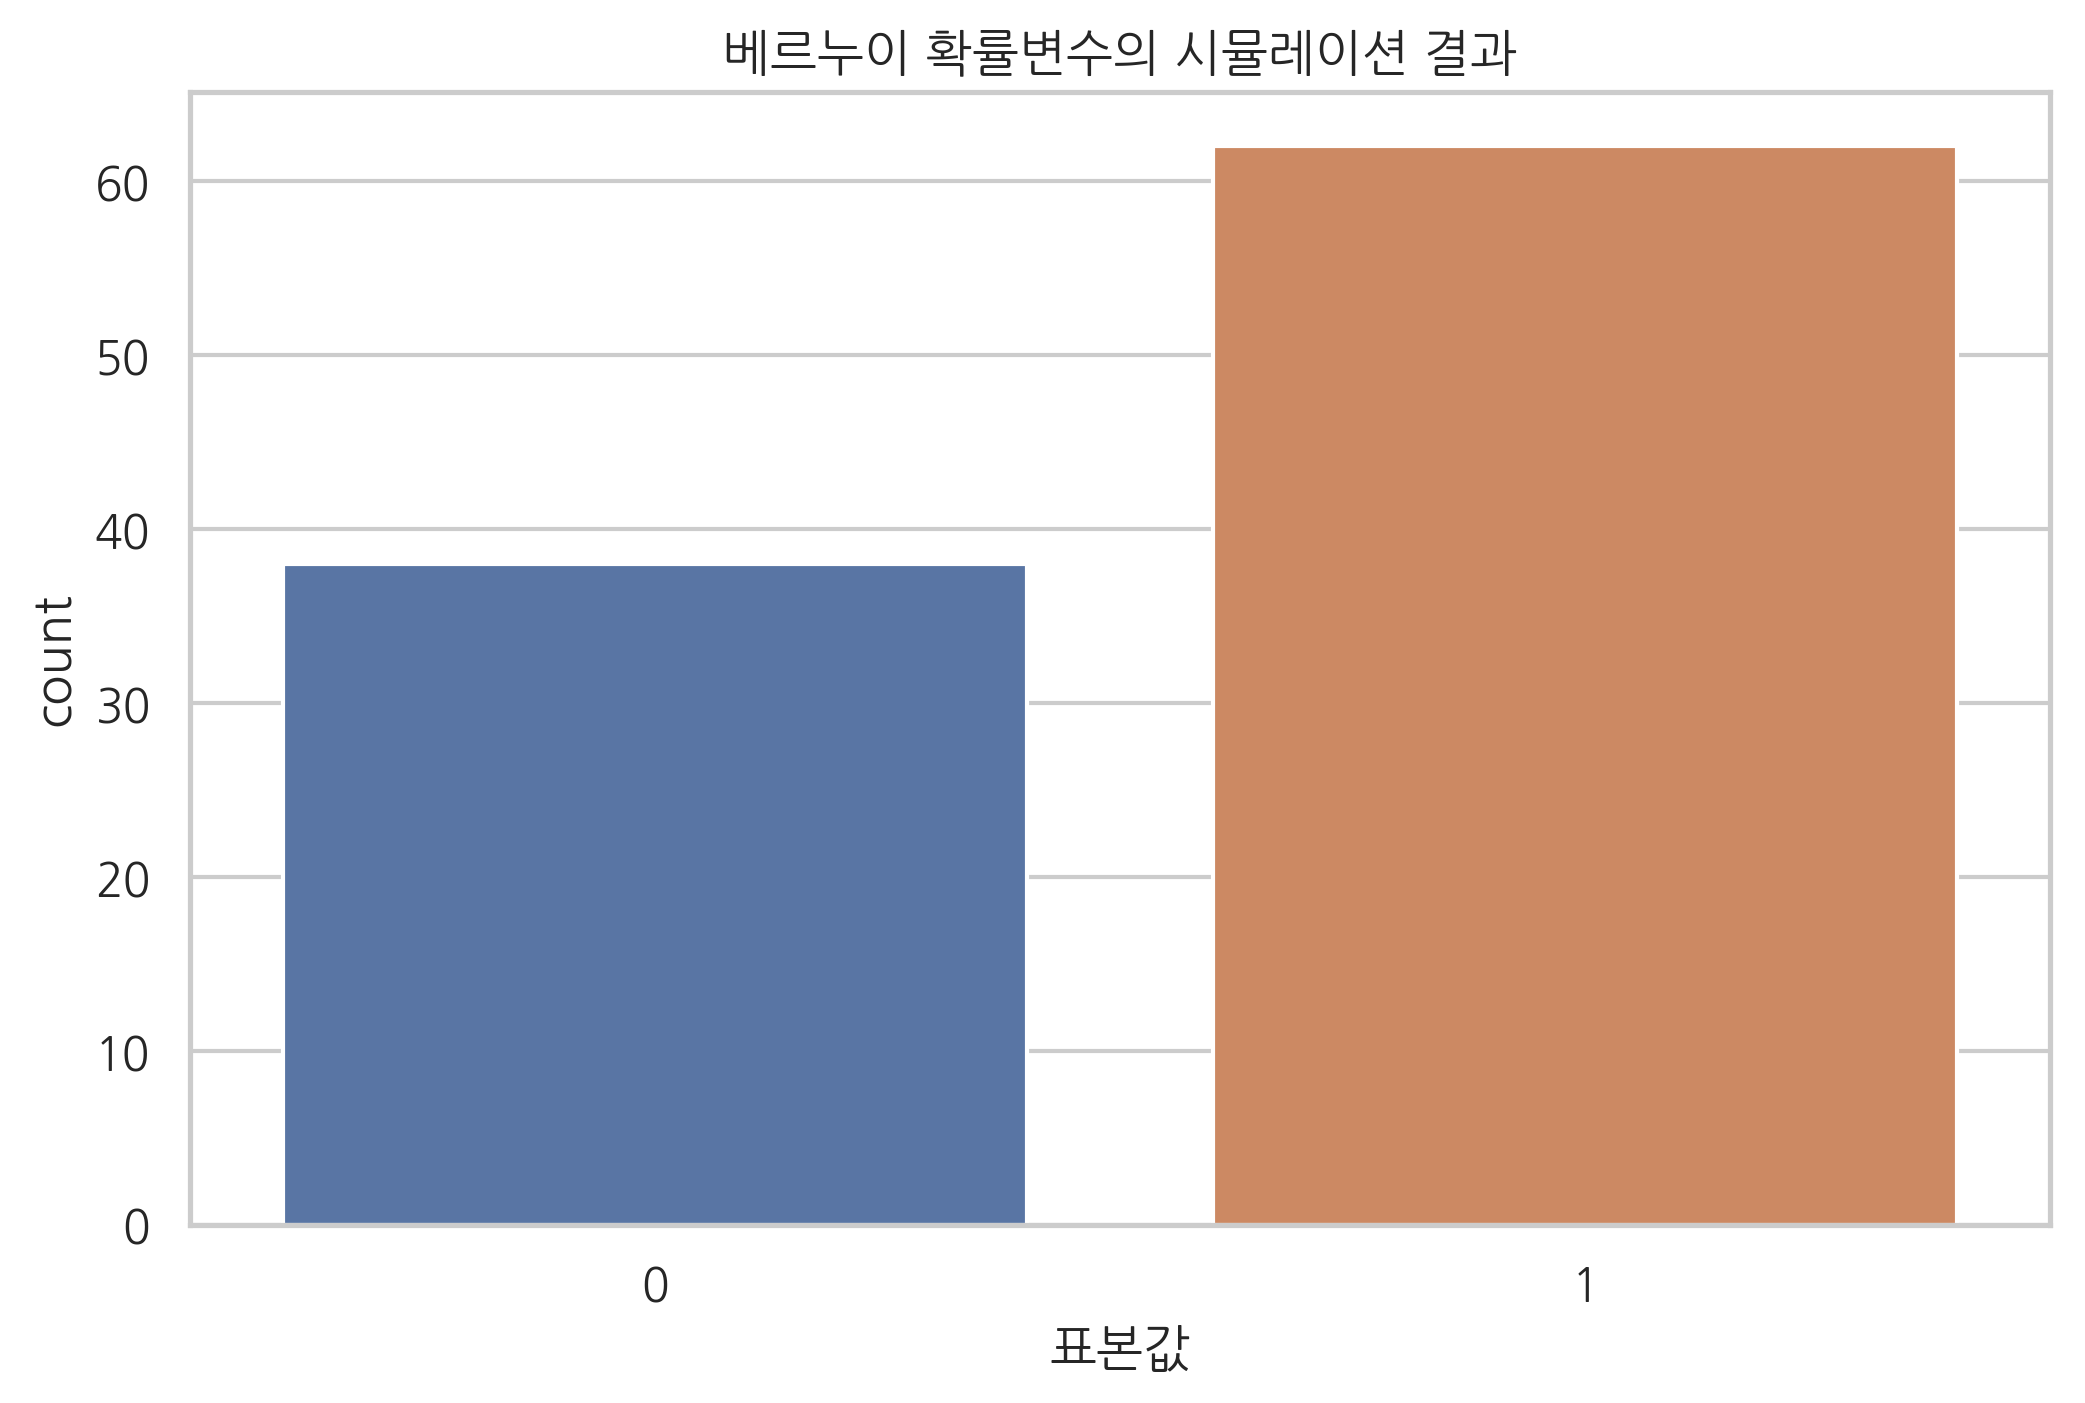

In [4]:
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

이론적인 확률분포와 표본의 확률분포를 동시에 보이려면 다음과 같은 코드를 사용한다.

In [5]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


seaborn의 `barplot` 명령으로 시각화하면 다음과 같다.

In [6]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


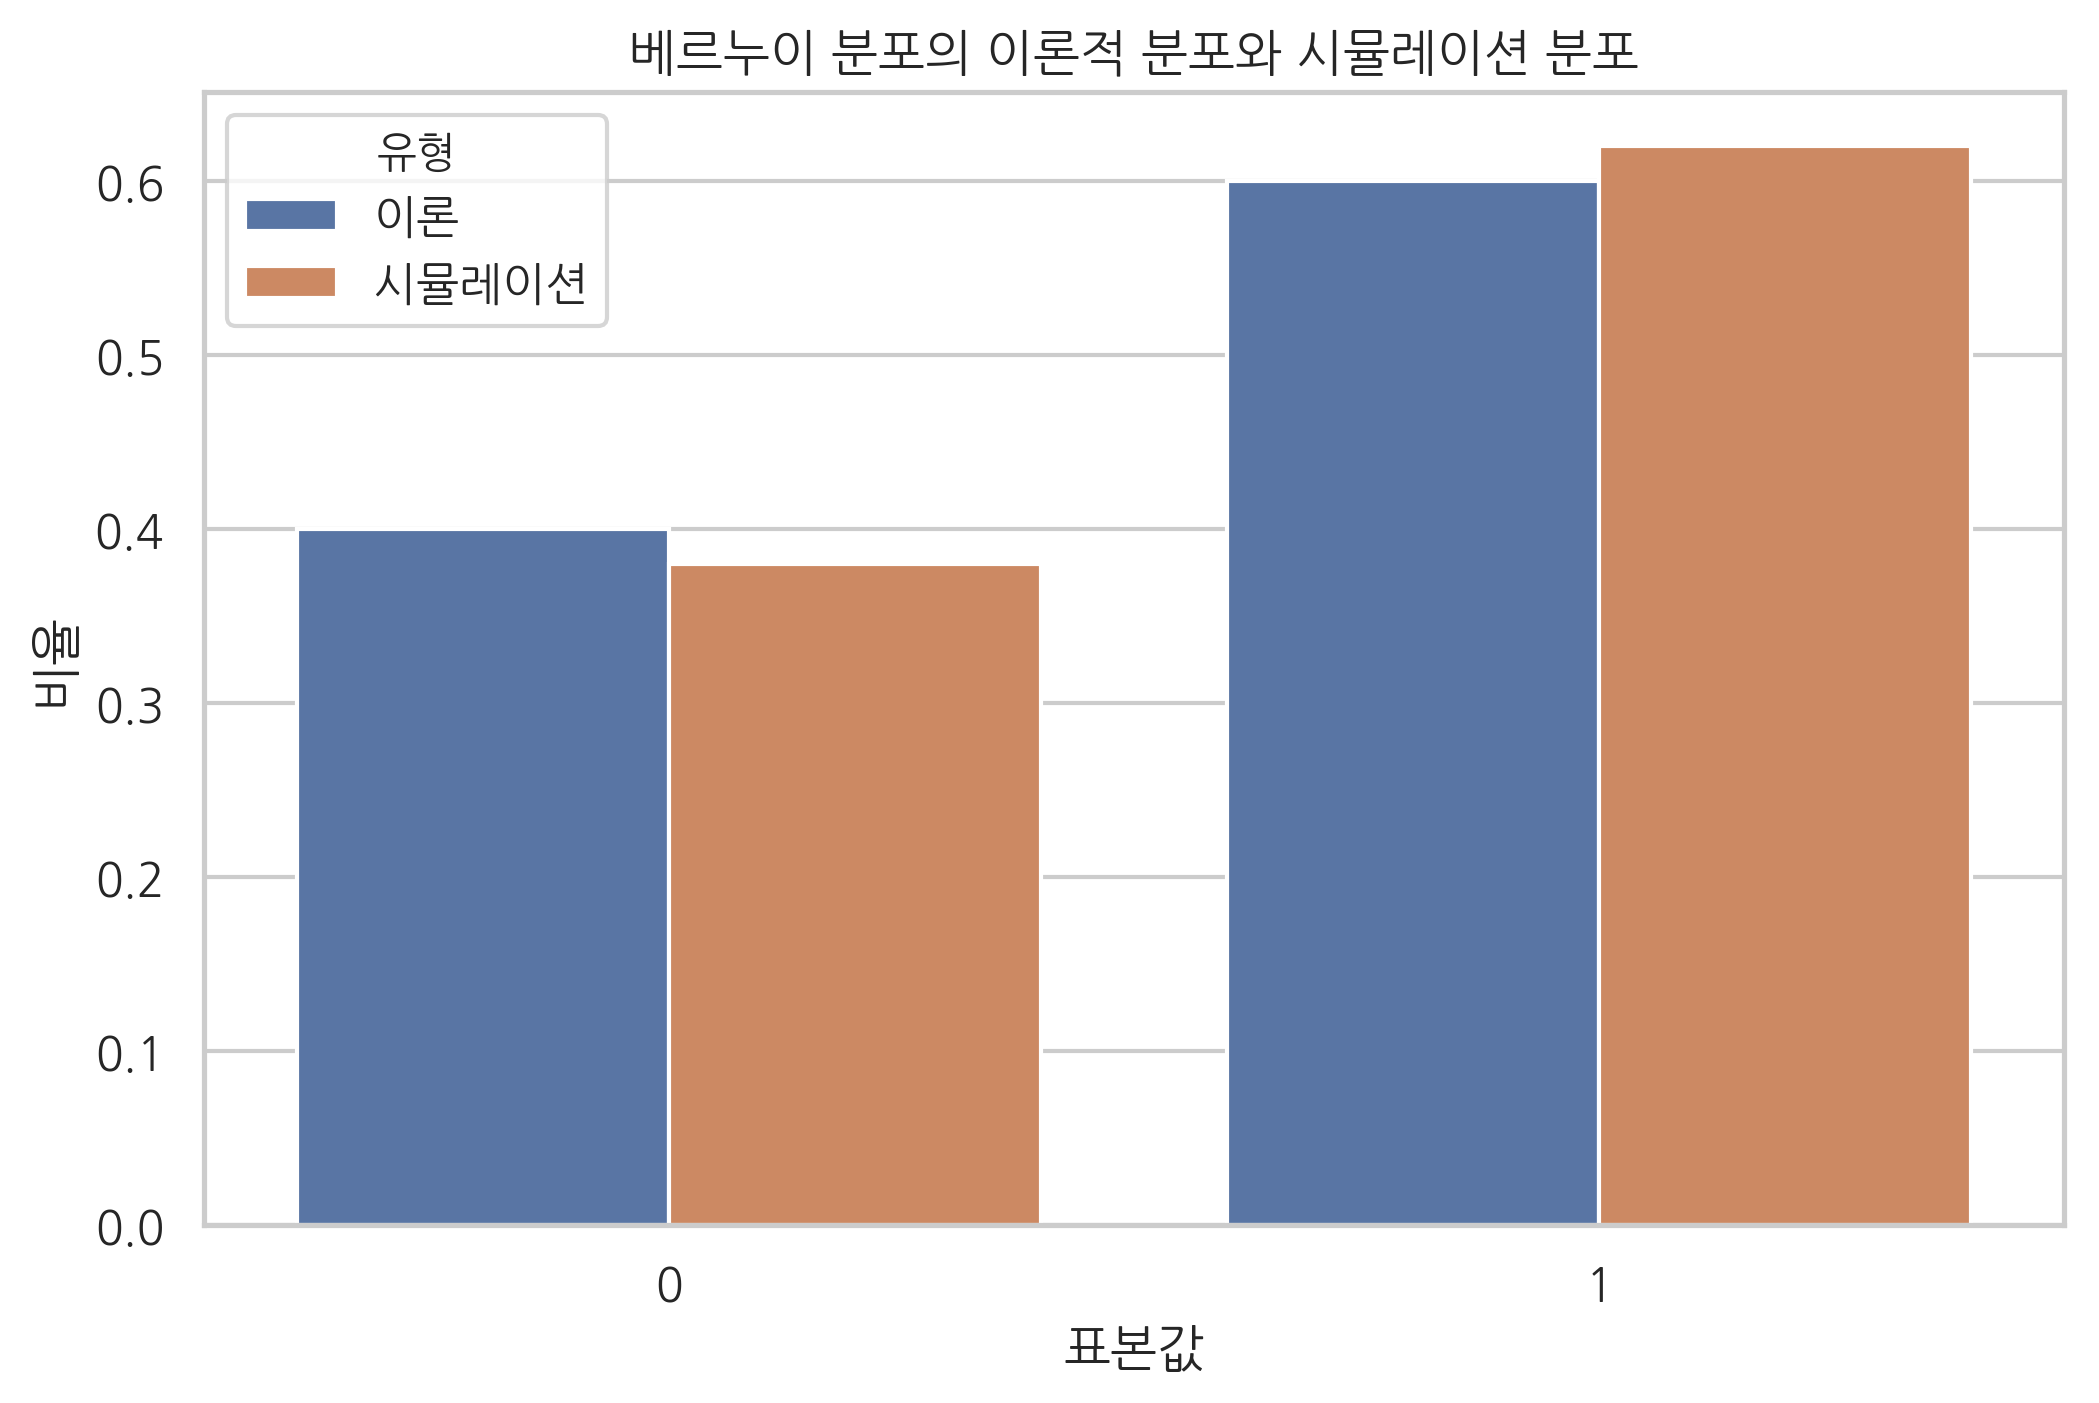

In [7]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이 분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

#### 연습 문제 8.2.2

베르누이 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 바 플롯을 그린다.
표본의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

1. $\mu = 0.5$
2. $\mu = 0.9$

## 베르누이 분포의 모멘트

베르누이 분포의 모멘트는 다음과 같다.

### 기댓값

$$\text{E}[X]  = \mu$$

(증명)

$$\text{E}[X] = \sum x_i P(x_i) = 1 \cdot \mu + 0 \cdot (1 - \mu) =  \mu$$

### 분산

$$\text{Var}[X] = \mu(1-\mu)$$

(증명)

$$\text{Var}[X] = \sum (x_i - \mu)^2 P(x_i) = (1 - \mu)^2 \cdot \mu + (0 - \mu)^2 \cdot (1 - \mu) = \mu(1-\mu)$$

앞의 예에서는 $\mu = 0.6$이였으므로 이론적인 기댓값과 분산은 다음과 같다.

$$ \text{E}[X] = 0.6 $$
$$ \text{Var}[X] = 0.6 \cdot (1 - 0.6) = 0.24 $$

데이터에서 계산한 표본평균 및 표본분산은 다음과 같이 계산한다.

In [8]:
np.mean(x)

0.62

In [9]:
np.var(x, ddof=1)

0.23797979797979804

기술통계값들은 SciPy의 ``describe`` 명령으로 계산할 수도 있다.

In [10]:
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)

## 베르누이 분포의 모수추정

데이터에서 모수의 값을 찾아내는 것을 **모수추정(parameter estimation)**이라고 한다. 베르누이 분포 모수 $\mu$를 추정한 값 $\hat\mu$은 다음처럼 계산한다.

$$ \hat{\mu} = \dfrac{\sum_{i=1}^N x_i}{N}= \dfrac{N_1}{N} $$

이 식에서 $N$은 전체 데이터의 수, $N_1$은 1이 나온 횟수이다.

## 베르누이 분포의 활용

베르누이 분포는 다음과 같은 경우에 사용된다.

1. 입력 데이터가 0 또는 1 혹은 참 또는 거짓, 두 개의 값으로 구분되는 카테고리 값인 경우, 두 종류의 값이 나타나는 비율을 표현하기 위해 사용된다. (빈도주의적 관점)
1. 분류예측 문제의 출력 데이터가 두 개의 값으로 구분되는 카테고리 값인 경우, 두 값 중 어느 값이 가능성이 높은지를 표현하기 위해 사용된다. (베이지안 관점)


예를 들어 스팸 메일(spam mail)과 정상 메일을 구분해야 하는 스팸 메일 필터(spam mail filter)를 만들어야 한다고 가정하자. 스팸 메일 필터를 만들기 위해 특정한 메일 계정으로 들어오는 메일을 모두 분석하였다.  만약  메일이 모두 10통이고 이 중 6통이 스팸 메일이라면 이 메일 계정으로 들어온 메일이 스팸 메일일 가능성은 60%이다. 이러한 상황은 $\mu = 0.6$인 베르누이 분포로 나타낼 수 있다.

$$ P_Y = \text{Bern}(y; \mu = 0.6) $$

확률변수 $Y$는 메일이 스팸 메일인지 아닌지를 나타내며 $Y=1$이면 스팸 메일이다.

또한 스팸 메일은 특정한 단어(키워드)를 가지고 있을 확률이 높다.  스팸 메일을 구분하기 위한 키워드가 여러 개라면 다음과 같이 BOW(Bag of Words) 인코딩된 벡터로 나타낼 수 있다. 이 예에서는 4개의 키워드를 사용하였다. 만약 어떤 메일이 첫번째와 세번째 키워드를 포함하고 있으며 두번째와 네번째 키워드는 포함하지 않으면 다음과 같은 특징 벡터로 표시할 수 있다.

$$ x = \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix} $$

여러개의 메일이 있으면 다음처럼 특징 행렬로 표시한다. 특징 행렬에서는 행 벡터가 메일을, 열 벡터가 키워드를 나타낸다.

$$ 
X =
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 \\
1 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 \\
\end{bmatrix} 
$$

이때, 스팸 메일의 특성은 4개의 베르누이 확률분포의 튜플 $(X_1, X_2, X_3, X_4)$로 나타낼 수 있다. 

$$ X_1 \sim \text{Bern}(x_1; \mu_1) : \text{스팸 메일이 첫번째 키워드를 포함하고 있을 확률}$$
$$ X_2 \sim \text{Bern}(x_2; \mu_2) : \text{스팸 메일이 두번째 키워드를 포함하고 있을 확률}$$
$$ X_3 \sim \text{Bern}(x_3; \mu_3) : \text{스팸 메일이 세번째 키워드를 포함하고 있을 확률}$$
$$ X_4 \sim \text{Bern}(x_4; \mu_4) : \text{스팸 메일이 네번째 키워드를 포함하고 있을 확률}$$

특징 행렬의 각 열로부터 각 베르누이 확률분포의 모수의 추정값을 구하면  다음과 같다.

$$ \hat\mu_1 = \dfrac{5}{6},\;\; \hat\mu_2 = \dfrac{4}{6},\;\; \hat\mu_3 = \dfrac{3}{6},\;\; \hat\mu_4 = \dfrac{3}{6} $$


#### 연습 문제 8.2.3

1. 스팸 메일이 아닌 정상 메일의 데이터가 다음과 같은 특징 행렬로 표시되면 정상 메일의 특성은 어떻게 나타낼 수 있는가?
<br><br>
$$ 
\begin{bmatrix} 
0 & 0 & 1 & 1 \\
0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 \\
\end{bmatrix} 
$$
<br>

2. 스팸 메일과 정상 메일의 특성을 모두 모형화하려면 몇 개의 베르누이 확률변수가 필요한가?